In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [43]:
# Importing the Excel data

data1 = pd.read_excel(r'Kinetic data.xls', sheet_name='Experiment 1' )
data2 = pd.read_excel(r'Kinetic data.xls', sheet_name= 'Experiment 2' )

In [ ]:
# Finding the order of reaction in A 

In [68]:
time1 = data1['Time (min)'].values
concA = data1['CA (M)'].values

In [9]:
time1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype=int64)

In [69]:
time2 = data2['Time (min)'].values
concB = data2['CB (M)'].values

In [27]:
concB

array([1.        , 0.92952973, 0.86244848, 0.78636541, 0.72565755,
       0.67296879, 0.62048022, 0.58376741, 0.53865066, 0.48744322,
       0.4512177 , 0.4184111 , 0.39685989, 0.36454591, 0.3307865 ,
       0.31330113, 0.27804602, 0.25772376, 0.24740911, 0.22068821,
       0.21423081, 0.18618045, 0.18292585, 0.15972038, 0.15956841,
       0.13461478, 0.12489025, 0.12542682, 0.11661382, 0.10084443,
       0.09914995, 0.0821979 , 0.08598414, 0.06905906, 0.07316583,
       0.05812204, 0.06432998, 0.05202096, 0.05847434, 0.04412466,
       0.05018139, 0.04625111, 0.03268502, 0.03333504, 0.02674997,
       0.02798006, 0.02631608, 0.02132571, 0.02108028, 0.02831794,
       0.01568882, 0.01678503, 0.02548466, 0.02061271, 0.01967683,
       0.01971783, 0.02046597, 0.0188523 , 0.01701709, 0.01537514,
       0.01425987])

In [165]:
# Defining the different order plots

ln_concA = np.log(concA)  #First Order
rec_concA = 1/concA  #Second Order
rec_conc2A = 1/(concA**2)  # Third order

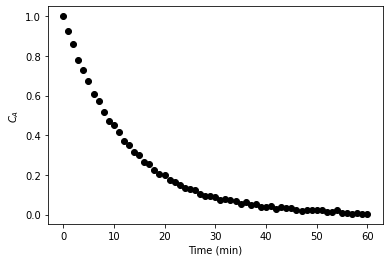

In [166]:
#Zeroth Order

plt.plot(time1, concA, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$C_A$")
plt.show()

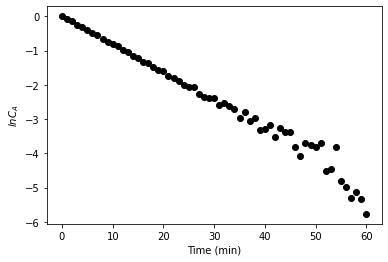

In [72]:
# First Order 

plt.plot(time1, ln_concA, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$lnC_A$")
plt.show()

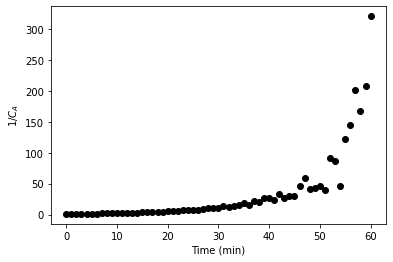

In [163]:
# Second Order 

plt.plot(time1, rec_concA, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$1/C_A$")
plt.show()

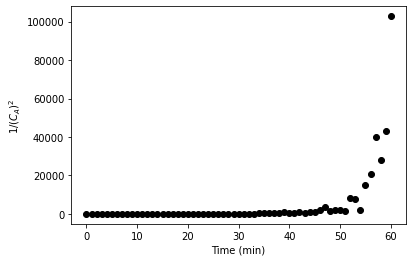

In [164]:
#Third Order

plt.plot(time1, rec_conc2A, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$1/(C_A)^2 $")
plt.show()

In [135]:
# The first order curve looks linear so we will fit that 
# The reaction is first order in A

In [150]:
# Data Fitting 

from sklearn.linear_model import LinearRegression

model = LinearRegression()
trans_time1 = time1.reshape((-1,1))  #transpose
model.fit(trans_time1,ln_concA)  #Linear regression

LinearRegression()

In [151]:
intercept1 = model.intercept_
slope1 = model.coef_
R_2 = model.score(trans_time1, ln_concA) #R^2

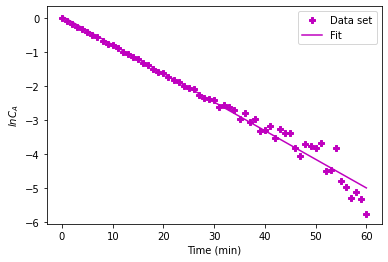

In [162]:
#Plotting the Fit

trendline = model.predict(trans_time1)
plt.plot(time1, ln_concA, "mP", label ='Data set')
plt.plot(time1, trendline, "m", label ='Fit')
plt.xlabel("Time (min)")
plt.ylabel("$lnC_A$")
plt.legend()
plt.show()

In [90]:
# Finding the order of reaction in B 

In [154]:
# Defining the different order plots

ln_concB = np.log(concB)  #First Order
rec_concB = 1/concB  #Second Order
rec_conc2B = 1/(concB**2)  # Third order

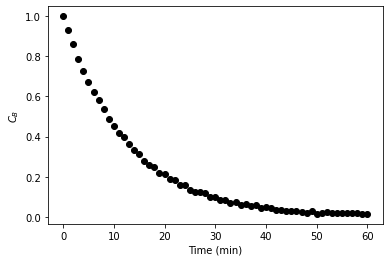

In [155]:
#Zeroth Order

plt.plot(time2, concB, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$C_B$")
plt.show()

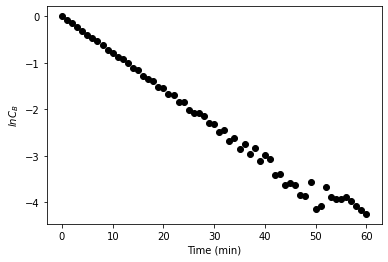

In [156]:
# First Order 

plt.plot(time2, ln_concB, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$lnC_B$")
plt.show()

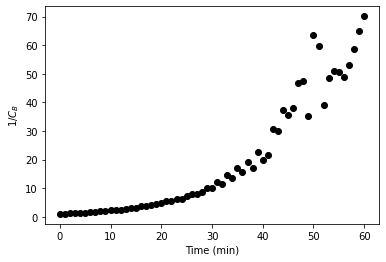

In [161]:
# Second Order 

plt.plot(time2, rec_concB, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$1/C_B$")
plt.show()

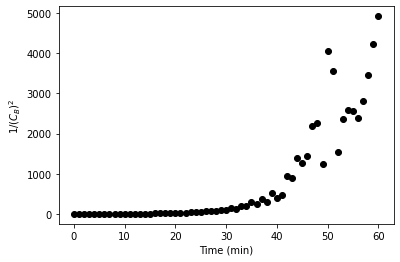

In [158]:
#Third Order

plt.plot(time2, rec_conc2B, "ko")
plt.xlabel("Time (min)")
plt.ylabel("$1/(C_B)^2$")
plt.show()

In [125]:
# First order curve is linear so we fit that
# The reaction is first order in B 

In [132]:
# Fitting the Data for B

model2 = LinearRegression()
trans_time2 = time2.reshape((-1,1))  #transpose
model2.fit(trans_time2,ln_concB)  #Linear regression

LinearRegression()

In [131]:
intercept2 = model2.intercept_
slope2 = model2.coef_
R_2B = model2.score(trans_time2, ln_concB) #R^2

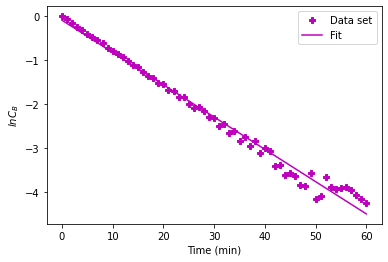

In [159]:
#Plotting the Fit

trendlineB = model2.predict(trans_time2)
plt.plot(time2, ln_concB, "mP", label ='Data set')
plt.plot(time2, trendlineB, "m", label ='Fit')
plt.xlabel("Time (min)")
plt.ylabel("$lnC_B$")
plt.legend()
plt.show()

In [185]:
# The actual rate constant 

k = -(slope1/10 + slope2/10)/2  # (m^3/mol.min)
print('The value of k is', k)

The value of k is [0.00790161]
